<a href="https://colab.research.google.com/github/StevenMena/05MIAR---Aprendizaje_Supervisado/blob/main/Examen_C2_MenaChavez_StevenAlberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EXAMEN - Convocatoria 2 - Programación
Utilizar el conjunto de datos "dataset_exam_C2.csv" para resolver el ejercicio.

#### 1) Carga de datos (0.5 puntos)
Cargar el dataframe "dataset_exam_C2.csv" y obtener por separado los datos "X" y la variable target "y"

In [59]:

import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.svm import SVR

In [ ]:
# Cargar el archivo "dataset_exam_C2.csv" utilizando la librería pandas


# Convertir la información en formato numpy.array()


# Separar los datos "X" y la variable target "y" (el target corresponde a la última columna)



In [35]:
#Para cargar el archivo en formato npy
data = np.load('dataset_exam_C2_backup.npy', allow_pickle=True)
#display(data)

# Separar los datos "X" y la variable target "y" (el target corresponde a la última columna)

X =  data[:,:-1]
y = data[:,-1]

#### 2) Tratamiento de datos (1 punto)
¡IMPORTANTE! Si este ejercicio no se consigue resolver, pasad directamente al siguiente cargando el dataset correspondiente.

In [ ]:
# Discretizar los atributos relativos a variables categóricas, es decir, no numéricas. 
# Se recomienda utilizar la función "isinstance()" para saber si la variable es numérica o no.
# Se recomienda utilizar la función preprocessing.OrdinalEncoder() + "fit_transform() para realizar directamente la conversión.
# Otras funciones que pueden ayudar para tratar la dimensión de los datos son: "np.expand_dims()" y "np.squeeze()"


# Mostrar por pantalla cómo queda el dataset tras discretizar las variables categóricas

    

#### 3) Partición de datos externa (1 punto)
¡IMPORTANTE!  En caso de no haber realizado con éxito el ejercicio anterior, cargar primero el "dataset_backup.npy" utilizando "np.load()". Después, vuelve a separar los datos "X" y la variable target "y".

Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42).

In [36]:
# Partición hold-out seleccionado un 20% de los datos para test. Fijar semilla en 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Mostrar por pantalla las dimensiones de los datos de train y test
print("Matriz de datos de Entrenamiento: ", np.shape(X_train))
print("Matriz de datos de Test: ", np.shape(X_test))

#print(X_train)


Matriz de datos de Entrenamiento:  (1070, 6)
Matriz de datos de Test:  (268, 6)


#### 4) Estandarización de los datos de train y test (1 punto)
Utilizar el método StandardScaler().

In [37]:
standardizer = StandardScaler()

# Estandarización de los datos de entrenamiento
X_train_std = standardizer.fit_transform(X_train)

# Estandarización de los datos de test
X_test_std = standardizer.transform(X_test)


#### 5) Selección de atributos en train y test (1 punto)
Aplicar el método de mutual_info_regression utilizando la función "SelectPercentile" con percentile=90

In [38]:
selector = SelectPercentile(mutual_info_regression, percentile=90)
# Selección de los atributos de entrenamiento
X_train_selected = selector.fit_transform(X_train_std, y_train)

# Selección de los atributos de test
X_test_selected = selector.transform(X_test_std)

# Mostrar por pantalla las dimensiones de los datos de train y test
print("Nueva Matriz de datos de Entrenamiento: ", np.shape(X_train_selected))
print("Nueva Matriz de datos de Test: ", np.shape(X_test_selected))


Nueva Matriz de datos de Entrenamiento:  (1070, 5)
Nueva Matriz de datos de Test:  (268, 5)


#### 6) Comparación de modelos de regresión mediante validación cruzada (2.5 puntos)
Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: K-vecinos más cercanos (KNN) y Support Vector Machine (SVM). La comparación debe realizarse únicamente en términos de coeficiente de determinación (R2) proporcionando resultados de media +- desviación estándar.

In [39]:
#Definir K-vecinos
k = 10
reg = KNeighborsRegressor(n_neighbors = k, weights='distance', metric='euclidean')

#Definir SVM
svm = SVR(C=1, kernel='rbf')

r2_cv_results = cross_val_score(reg, X_train_selected, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring='r2')
print("cross_val_R2_K-Vecinos:   %0.4f +/- %0.4f" % (r2_cv_results.mean(), r2_cv_results.std()))


r2_cv_results_svm = cross_val_score(svm, X_train_selected, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring='r2')
print("cross_val_R2_SVM:   %0.4f +/- %0.4f" % (r2_cv_results_svm.mean(), r2_cv_results_svm.std()))



cross_val_R2_K-Vecinos:   0.8142 +/- 0.0279
cross_val_R2_SVM:   -0.0957 +/- 0.0324


#### 7) Evaluación de los modelos sobre el conjunto de test (1 punto)
- Definir una función "plot_bisectriz()" cuyos inputs sean:
 * "y" --> la variable target,
 * "y_pred" --> las predicciones del modelo, y 
 * "name" --> el nombre del algoritmo utilizado.
 
- El output de dicha función será un gráfico basado en la bisectriz para ver las sobreestimaciones y subestimaciones de cada modelo

In [70]:
def plot_bisectriz(y, y_pred, name):
    

    # Plot bisectriz
    plt.scatter(y, y_pred, edgecolors=(0, 0, 0))
    plt.xlabel('y')
    plt.ylabel('y_pred')
    plt.title('Bisector for ' + name)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.grid()
    plt.show()



#### 8) Evaluación de los modelos sobre el conjunto de test (2 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento.
- Evaluar su rendimiento sobre el conjunto de test.
- Llamar a la función "plot_bisectriz" para ver las sobreestimaciones y subestimaciones de cada modelo.
- Crear una tabla donde se muestren los resultados de todos los modelos.
 * Las filas serán: R2, MAE, MAPE, MSE y RMSE
 * Las columnas serán: KNN y SVM

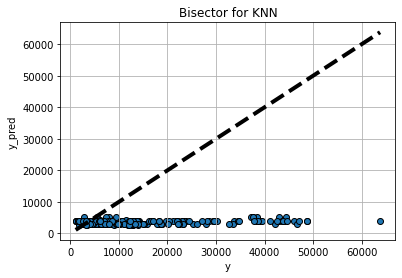

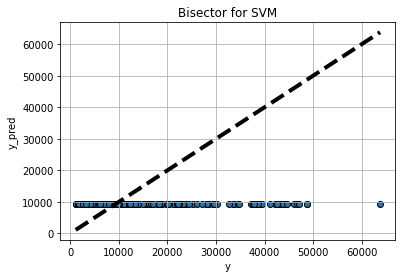

         R2        MAE      MAPE           MSE        RMSE
KNN -0.5413  9961.1418   67.0738  2.392797e+08  15468.6679
SVM -0.0792  8631.3235  112.4366  1.675394e+08  12943.7006


In [71]:
#Entrenamiento del KNN
reg.fit(X_train, y_train)

#Entrenamiento del SVM
svm.fit(X_train, y_train)

#Definir funcion MAPE
def mape(y_true,y_pred): 
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Definir funcion RMSE
def rmse(y_true,y_pred): 
  return sqrt(mean_squared_error(y_true, y_pred))

  

# Evaluación de los modelos en el conjunto de test
models = {'KNN': reg, 'SVM': svm}
# Métricas de evaluación.
metrics = {
    'R2': r2_score,
    'MAE': mean_absolute_error,
    'MAPE': mape,
    'MSE': mean_squared_error,
    'RMSE': rmse
    }
results = {}

#Predecir sobre los datos de test estandarizados
for model_name, model in models.items():
    y_pred = model.predict(X_test_std)
    plot_bisectriz(y_test, y_pred,model_name)
    result = []
    for metric_name, metric in metrics.items():
        score = metric(y_test, y_pred)
        result.append(round(score,4))
    results[model_name] = result
    




# Impresión de los resultados
import pandas as pd

df_results = pd.DataFrame.from_dict(results, orient='index', columns=metrics.keys())
print(df_results)






